In [1]:
from dotenv import load_dotenv
from PIL import Image
from IPython.display import display

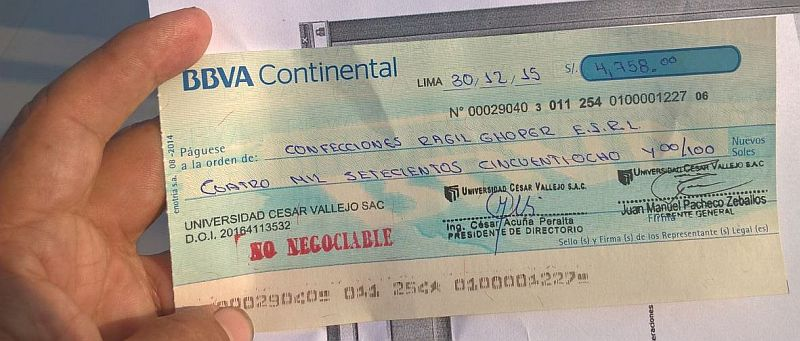

In [2]:
image_path = './_img/cheque.jpg'

try:
    pil_image = Image.open(image_path)
    display(pil_image)
except FileNotFoundError:
    print(f"Error: The image file '{image_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [14]:
import ollama

prompt_cheque = "describe la imagen y luego como funcionario de negocio elabore un json donde se pueda estructurar una transaccion a partir del cheque"
with open(image_path, "rb") as f:
    image_bytes = f.read()

res = ollama.generate(model='llava', prompt=prompt_cheque, images=[image_path])
print(res["message"]["content"])


KeyError: 'message'

In [ ]:
%%time
res = ollama.chat(
    model = "gpt-oss:20b",
    messages =[
        {
            'role': 'user',
            'content': prompt_cheque,
            'images': [image_bytes]
        }
    ]
)
print(res["message"]["content"])

## 1. Descripción de la imagen (cheque)

En la imagen se aprecia un **cheque bancario en formato horizontal** con los siguientes elementos típicos (ordenado de izquierda a derecha):

| Sección | Detalle típico | Comentario |
|---------|----------------|------------|
| **Encabezado** | Logo de la entidad bancaria (esquina superior izquierda) | Reforza la identidad institucional. |
| **Número de cheque** | Campo numérico en la esquina superior derecha | Útil para trazabilidad. |
| **Fecha** | Cuadro con el día, mes y año | Indica la fecha de emisión. |
| **Beneficiario** | Línea para el nombre del receptor | En la práctica se escribe “A nombre de: __________________”. |
| **Monto en cifras** | Campo numérico en la parte central | Ej. “$ 1,234.56” |
| **Monto en letras** | Línea larga con el texto “Mil doscientos treinta‑cuatro con 56/100” | Asegura la legibilidad del valor. |
| **Firma del pagador** | Línea con firma manuscrita | Verifica la autorización. |
| **Firma del banco** | Línea 

Image saved as ./_img/11fec533-7c6f-41c1-b871-ee32d82a23d0-imagen.png


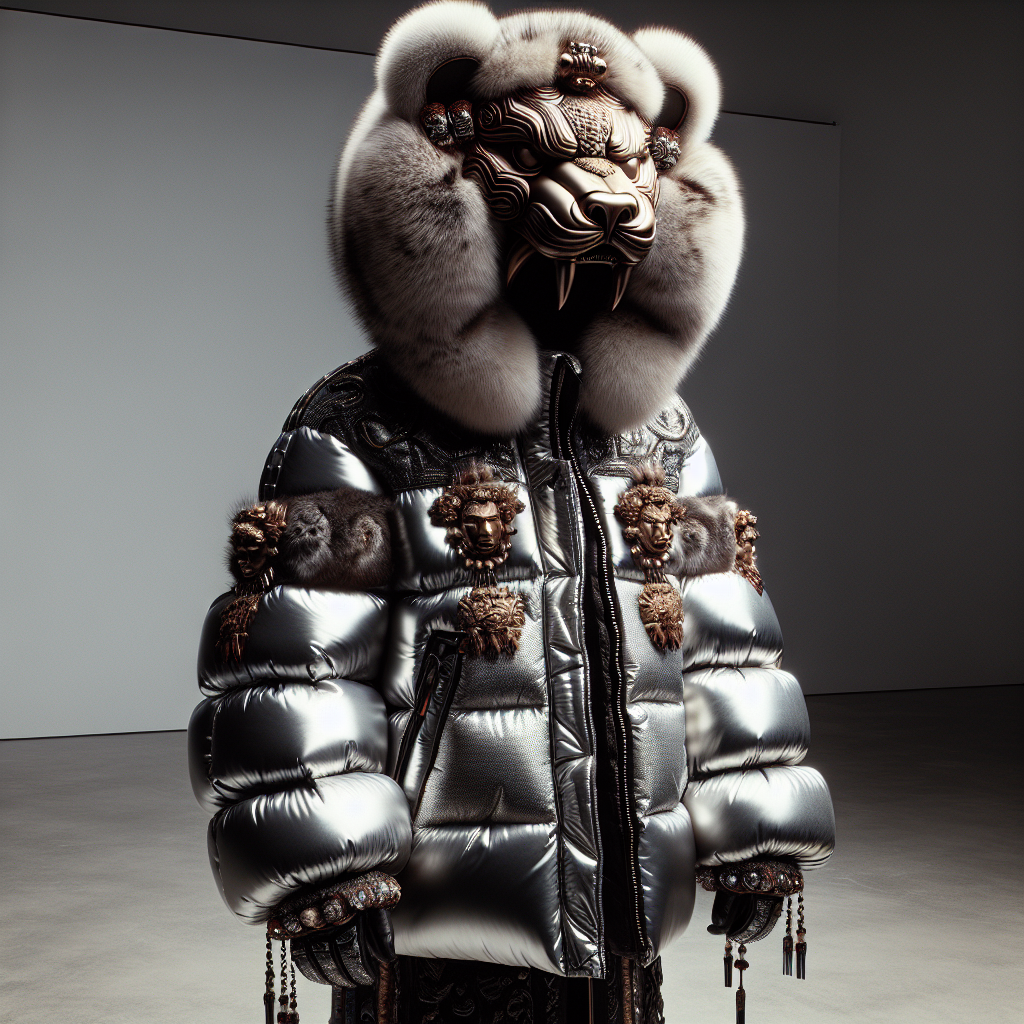

In [ ]:
from openai import OpenAI
import requests
from PIL import Image
import os
import uuid

# Assuming your API key is set as an environment variable OPENAI_API_KEY
client = OpenAI()

prompt = """
Fotografía editorial de cuerpo completo de una modelo usando una chaqueta inflable tipo plumón con 
forma escultórica de cabeza de oso. La chaqueta incluye detalles de pelaje texturizado y elementos metálicos,
decorada con ornamentos inspirados en un tocado tradicional de dragón chino.
Fondo limpio de estudio, iluminación de alta moda, enfoque nítido, sombras dramáticas.
Estética de revista tipo Vogue —ar 16:9 —style raw —v 6.0
"""

response = client.images.generate(
    model="dall-e-3",
    prompt=prompt,
    n=1,  # Number of images to generate
    size="1024x1024"
)

carpeta = "./_img/"
formato = "png"

image_url = response.data[0].url
image_data = requests.get(image_url).content
image_path = os.path.join(carpeta, str(uuid.uuid4())+f"-imagen.{formato.lower()}")
with open(image_path, "wb") as f:
    f.write(image_data)
print(f"Image saved as {image_path}")

try:
    pil_image = Image.open(image_path)
    display(pil_image)
except FileNotFoundError:
    print(f"Error: The image file '{image_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [12]:
!pip install higgsfield-client


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: C:\gitprojects\ses17\.venv\Scripts\python.exe -m pip install --upgrade pip
